In [29]:
# imports
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from collections import defaultdict
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import copy
import time
import math
import re

In [30]:
### FUNCTIONS

def standardize(col):
    mean = np.mean(col)
    std = np.std(col)
    col_std_ized = (col - mean) / std
    return col_std_ized

In [31]:




### Load, Clean, and Organize our Data





In [32]:
years = [2015, 2016, 2017, 2018, 2019]
joined_column_1 = []
joined_column_2 = []
joined_column_3 = []
joined_column_4 = []
joined_column_5 = []
joined_column_6 = []
joined_column_7 = []
joined_column_8 = []
joined_column_9 = []
for year in years:
    df = pd.read_csv("data/" + str(year) + ".csv")
    for col_name in df:
        if re.match("(?i)(.*score.*)", col_name):
            s = df[col_name]
            joined_column_1.append(s)
        if re.match("(?i)(.*GDP.*)", col_name):
            s2 = df[col_name]
            joined_column_2.append(s2)
        if re.match("(?i)(Family|Social support)", col_name):
            s3 = df[col_name]
            joined_column_3.append(s3)
        if re.match("(?i)(.*health.*)", col_name):
            s4 = df[col_name]
            joined_column_4.append(s4)
        if re.match("(?i)(.*freedom.*)", col_name):
            s5 = df[col_name]
            joined_column_5.append(s5)
        if re.match("(?i)(.*generosity.*)", col_name):
            s6 = df[col_name]
            joined_column_6.append(s6)
        if re.match("(?i)(.*corruption.*)", col_name):
            s7 = df[col_name]
            joined_column_7.append(s7)
        if re.match("(?i)(.*rank.*)", col_name):
            s = df[col_name]
            joined_column_8.append(s)
        if re.match("(?i)(.*country*)", col_name):
            s2 = df[col_name]
            joined_column_9.append(s2)

            
l = [joined_column_1, joined_column_2, joined_column_3, joined_column_4, joined_column_5, joined_column_6, joined_column_7, joined_column_8, joined_column_9]         
columns_9 = []
for col in l:
    column = pd.concat(col, axis = 0)
    columns_9.append(column)

total_df = pd.concat(columns_9, axis = 1)

In [33]:
total_df

,0,1,2,3,4,Generosity,5,6,7
0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,1,Switzerland
1,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2,Iceland
2,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,3,Denmark
3,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,4,Norway
4,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,5,Canada
...,...,...,...,...,...,...,...,...,...
151,3.334,0.35900,0.71100,0.61400,0.55500,0.21700,0.41100,152,Rwanda
152,3.231,0.47600,0.88500,0.49900,0.41700,0.27600,0.14700,153,Tanzania
153,3.203,0.35000,0.51700,0.36100,0.00000,0.15800,0.02500,154,Afghanistan
154,3.083,0.02600,0.00000,0.10500,0.22500,0.23500,0.03500,155,Central African Republic


In [34]:
# dont forget generosity is in here already
cleaned_df = total_df.rename(columns={0: "Happiness_Score", 1: "GDP_per_Capita", 2: "Family/Social Support",
                         3: "Health/Life Expectancy", 4: "Freedom", 5: "Government Corruption",
                                     6: "Ranking", 7: "Country"})

# there's one row with an na
cleaned_df9 = cleaned_df.dropna()

In [35]:
# Slice Frame to certain features and Split Data

cleaned_df7 = cleaned_df9.loc[:,"Happiness_Score":"Government Corruption"]

X_train, X_test, y_train, y_test = train_test_split(
    cleaned_df7[["GDP_per_Capita","Family/Social Support",
                "Health/Life Expectancy","Freedom","Generosity","Government Corruption"]],
    cleaned_df7["Happiness_Score"], test_size=0.20, random_state=42)

In [36]:
# Standardize

# train xs
x_train_ized = X_train.apply(standardize, axis = 0)
# train ys
mean = np.mean(y_train)
std = np.std(y_train)
y_train_ized = (y_train - mean) / std

In [37]:
#insert a bias feature
x_train_ized.insert(0, "bias", np.array([1] * len(x_train_ized)))

In [38]:




# Gradient Descent





In [39]:
# inputs and initialize variables
thetas = [-.25, .25, -.75, .75, .5, -.5, .41]
learning_rate = .01
step_size = learning_rate / len(x_train_ized)
threshold = 2**(-23)

RMSE_change = 10
rmse_l = [1]
test_rmse_l = []
i = 1
while RMSE_change >= threshold and i <= 10000: 
    # 625 by 1 matrix
    error = x_train_ized.dot(thetas) - y_train_ized
    RMSE = math.sqrt((error**2).sum() / len(x_train_ized)) 
    RMSE_change = abs((rmse_l[-1]-RMSE)/rmse_l[-1])
    rmse_l.append(RMSE)
    # 7 by 1 matrix
    theta_error = x_train_ized.T.dot(error)
    change_theta = step_size * theta_error
    thetas = thetas - change_theta
    i+=1

In [40]:
i

1864

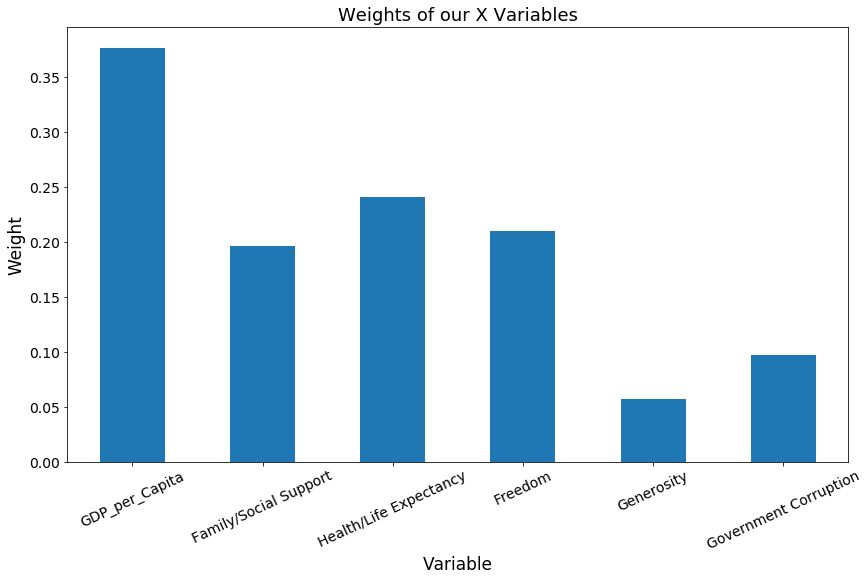

In [41]:
# plot gradient descent results

thetas_no_bias = thetas[1:]
plt.figure(figsize = (14,8))
thetas_no_bias.plot.bar()
plt.title("Weights of our X Variables", fontsize = 18)
plt.xlabel("Variable", fontsize = 17)
plt.ylabel("Weight", fontsize = 17)
plt.xticks(fontsize = 14, rotation = 25)
plt.yticks(fontsize = 14)
plt.show()

In [42]:




# K-Nearest-Neigbors





In [43]:
# Slice to features wanted and Split Data

cleaned_df7 = cleaned_df9.loc[:,"GDP_per_Capita" : "Ranking"]

X_train, X_test, y_train, y_test = train_test_split(
    cleaned_df7[["GDP_per_Capita","Family/Social Support",
                "Health/Life Expectancy","Freedom","Generosity","Government Corruption"]],
    cleaned_df7["Ranking"], test_size=0.33, random_state=42)


In [44]:
# Make classes based on rank of a country 1 - 155, (5 of each rank because its over 5 years of course)

# takes 132 sec to run
s = time.time()

# making our classes of our ranking based on certain numbers of splits
split_n = [5, 10, 15, 25, 50]

accuracy_rate = []
classes = []

for t in split_n:
    y_train_class = []
    for y in y_train:
        class_num = math.ceil(y/t)
        y_train_class.append(class_num)

    y_test_class = []
    for y2 in y_test:
        class_num2 = math.ceil(y2/t)
        y_test_class.append(class_num2)


    # write my version of KNN, with k = 1 (getting the one closest neighbor), use SSD for similarity

    correct = 0
    for z, test_sample in enumerate(X_test.iterrows()):
        test_sample = np.array(test_sample[1:])
        minimum = 100000
        for j, train_sample in enumerate(X_train.iterrows()):
            train_sample = np.array(train_sample[1:])
            dist = distance.cdist(np.array(test_sample), np.array(train_sample), 'sqeuclidean')
            dist[0][0]
            if dist < minimum:
                minimum = dist
                min_sample = j
        # given min distance between x train and x test, what is y train class of that x train
        y_pred = y_train_class[min_sample]
        actual_y = y_test_class[z]
        if y_pred == actual_y:
            correct += 1

    accuracy = correct/len(y_test)
    accuracy_rate.append(accuracy)
    classes.append(max(y_train_class))

e =  time.time()
#e-s

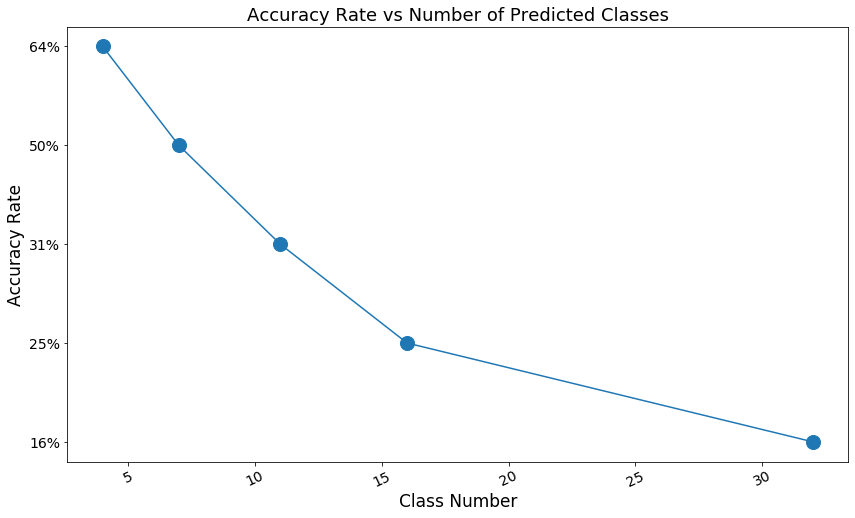

In [45]:
# Plot and Format KNN Results

accuracy_rate2 = []
for item in accuracy_rate:
    item = "{:.0%}".format(item)
    accuracy_rate2.append(item)

plt.figure(figsize = (14,8))
plt.plot(classes, accuracy_rate2, marker = 'o', markersize = 14)
plt.title("Accuracy Rate vs Number of Predicted Classes", fontsize = 18)
plt.ylabel("Accuracy Rate", fontsize = 17)
plt.xlabel("Class Number", fontsize = 17)
plt.xticks(fontsize = 14, rotation = 25)
plt.yticks(fontsize = 14)
plt.show()

In [46]:




## Unsupervised K-Means Clustering





In [47]:
# Clean/Initialize Data

# get features we want
cleaned_df8 = cleaned_df9.loc[:,"GDP_per_Capita" : "Country"]

# No Split
xs = cleaned_df8[["GDP_per_Capita","Family/Social Support",
                "Health/Life Expectancy","Freedom","Generosity","Government Corruption",
                 "Ranking", "Country"]]

# Turn data frame into matrix
xs = xs.values

## Note, we are keeping our y features Ranking and Country .. 
# .. Its unsupervised but we will use it for analysis after.

# randomize k clusters
np.random.seed(0)
np.random.shuffle(xs)

# Analysis, we are going to try to do 7 clusters based on KNN analysis..
#.. when we put it into 7 groups we got 50% accuracy
initialize_clusters = xs[:7]
ks = initialize_clusters

In [48]:
# Algorithm

# for every data point, find which points go to which cluster (smallest distance). 
# initialization round to create the first dictionary, set memberships.
updated_samples = defaultdict(list)
for sample in xs:
    # compute dist of sample to all 10 clusters.
    minimum = 1000000 
    for i, cluster in enumerate(ks):
        # slice out y features  (see note in Clean/Initialize Data cell above)
        sample_xs = sample[:-2]
        cluster_xs = cluster[:-2]
        #compute distance from each cluster to current data point
        dist = distance.cdist([sample_xs], [cluster_xs], 'sqeuclidean')
        dist = dist[0][0]
        d = math.sqrt(dist)
        if d < minimum:
            minimum = d
            min_cluster = i
    updated_samples[min_cluster].append(sample)   

In [49]:
count = 1
total_sum = 1

while count < 10000 and total_sum > (2 ** (-23)):  
    new_updated_samples = defaultdict(list)
    for cluster, sample2 in updated_samples.items():
        for item in sample2:
            sample = np.array(item)
            
            # compute dist of sample to all 10 clusters.
            minimum = 1000000 
            for i, cluster2 in enumerate(ks):
                # slice out y features  (see note in Clean/Initialize Data cell above)
                sample_xs = sample[:-2]
                cluster_xs = cluster2[:-2]
                dist = distance.cdist([sample_xs], [cluster_xs], 'sqeuclidean')
                dist = dist[0][0]
                d = math.sqrt(dist)
                if d < minimum:
                    minimum = d
                    min_cluster = i
            new_updated_samples[min_cluster].append(sample)   
    updated_samples = new_updated_samples
    old_ks = copy.deepcopy(ks)
    
    # reassign the clusters by adding all x's in its cluster, then dividing by number of xs.
    for c, (cluster3, sample3) in enumerate(new_updated_samples.items()):
        features_of_cluster = np.array(sample3).T
        # for each array of FEATURES (not data sample) take mean
        sliced_features_of_cluster = features_of_cluster[0:-2]
        for f, feature_of_cluster in enumerate(sliced_features_of_cluster):
            mean = np.mean(feature_of_cluster)
            # ks is 7 arrays.  array 1 in ks is associated with cluster 1
            # mean will be one number, the average of a particular feature.
            ks[c][f] = mean
    
    # get change in reference vectors
    total_sum = 0
    sliced_os = old_ks[:, 0:-2] 
    sliced_ks = ks[:, 0:-2] 
    for old_k, new_k in zip(sliced_os, sliced_ks):
        summ = 0
        for o_k, n_k in zip(old_k, new_k):
            summ = summ + abs(o_k - n_k)
        total_sum = total_sum + summ   
    count += 1

# remember # our ks are our changing means, so the countries on it don't mean anything
ks = ks[:, 0:-2] 

In [50]:
# get 5 countries that are closest to each cluster center.
closest = []
for k, (clus_n, samples_in_clus) in zip(ks, updated_samples.items()):
    minimum = 1000000
    k = np.array([k])
    minimums = []
    for sample in samples_in_clus:
        # compute dist btw each sample and k
        sample_xs = np.array([sample[:-2]])
        dist = distance.cdist(sample_xs, k, 'sqeuclidean')
        dist = dist[0][0]
        minimums.append(dist)
     
    # if we want the 5 closest samples of each cluster
    for i in range(5):
        
        # get index of minimum
        min_index = minimums.index(min(minimums))
        # relace with high value so we can pull the next smallest index
        minimums[min_index] = 10000000
        
        # append the min samples to list
        closest_sample = samples_in_clus[min_index]
        closest.append(closest_sample)

In [51]:
# print 5 samples for each of the 7 clusters

c = 0 
letter = 0
letters = ["A", "B", "C", "D", "E", "F", "G"]
rank_sum = 0
print("Cluster", letters[letter] + ":")
letter+=1
for sample in closest:
    if c % 5 == 0 and c !=0:
        average_rank = rank_sum / 5
        rank_sum = 0
        print("Average Happiness Ranking in Cluster:", average_rank)
        print("\n")
        print("Cluster", letters[letter] + ":")
        letter+=1
    
    print("\t",sample[7] + ":", "Rank", sample[6])

    rank_sum += sample[6]
    c += 1
print("Average Happiness Ranking in Cluster:", average_rank)

#dont forget, we use each country over 5 years, so its possible each country appears in two different clusters.

Cluster A:
	 Chile: Rank 25
	 Slovakia: Rank 45
	 Turkey: Rank 74
	 Argentina: Rank 30
	 Mexico: Rank 23
Average Happiness Ranking in Cluster: 39.4


Cluster B:
	 Kosovo: Rank 66
	 Guatemala: Rank 29
	 Vietnam: Rank 94
	 Jordan: Rank 90
	 Mongolia: Rank 100
Average Happiness Ranking in Cluster: 75.8


Cluster C:
	 Belgium: Rank 18
	 Austria: Rank 12
	 Germany: Rank 16
	 Puerto Rico: Rank 15
	 France: Rank 32
Average Happiness Ranking in Cluster: 18.6


Cluster D:
	 Germany: Rank 15
	 Netherlands: Rank 6
	 Austria: Rank 13
	 Austria: Rank 12
	 Belgium: Rank 17
Average Happiness Ranking in Cluster: 12.6


Cluster E:
	 Peru: Rank 64
	 Jordan: Rank 80
	 El Salvador: Rank 46
	 Macedonia: Rank 95
	 Albania: Rank 109
Average Happiness Ranking in Cluster: 78.8


Cluster F:
	 Togo: Rank 150
	 Ethiopia: Rank 115
	 Benin: Rank 102
	 Burkina Faso: Rank 145
	 Togo: Rank 139
Average Happiness Ranking in Cluster: 130.2


Cluster G:
	 Burkina Faso: Rank 134
	 Senegal: Rank 142
	 Tanzania: Rank 153
	 M

In [52]:
# Below is what we may have expected the average ranking in each cluster to be.

# 155 countries over 7 clusters
x = 155/7
run = 11.0
print(11)
for i in range(6):
    run += x 
    print(round(run,0))
    
# See paper analysis on why this would have been optimal with 3 clusters

11
33.0
55.0
77.0
100.0
122.0
144.0


In [53]:
# Run to print out Statistical Analysis

high_xs = cleaned_df[["GDP_per_Capita", "Health/Life Expectancy","Freedom"]]
low_xs = cleaned_df[["Family/Social Support", "Generosity","Government Corruption"]]

#means
print("High Weight Features Means:\n")
print("___Happiest 50___:")
print(high_xs[:52].apply(lambda x: np.mean(x), axis = 0))
print("___Second Happiest 50___:")
print(high_xs[52:104].apply(lambda x: np.mean(x), axis = 0))
print("___Third Happiest 50___:")
print(high_xs[104:156].apply(lambda x: np.mean(x), axis = 0))
print()
print("Low Weight Features Means:\n")
print("___Happiest 50___:")
print(low_xs[:52].apply(lambda x: np.mean(x), axis = 0))
print("___Second Happiest 50___:")
print(low_xs[52:104].apply(lambda x: np.mean(x), axis = 0))
print("___Third Happiest 50___:")
print(low_xs[104:156].apply(lambda x: np.mean(x), axis = 0))
print()
print("\n\n\n")

#stds
print("High Weight Features Standard Deviations:\n")
print("___Happiest 50___:")
print(high_xs[:52].apply(lambda x: np.std(x), axis = 0))
print("___Second Happiest 50___:")
print(high_xs[52:104].apply(lambda x: np.std(x), axis = 0))
print("___Third Happiest 50___:")
print(high_xs[104:156].apply(lambda x: np.std(x), axis = 0))
print()
print("Low Weight Features Standard Deviations:\n")
print("___Happiest 50___:")
print(low_xs[:52].apply(lambda x: np.std(x), axis = 0))
print("___Second Happiest 50___:")
print(low_xs[52:104].apply(lambda x: np.std(x), axis = 0))
print("___Third Happiest 50___:")
print(low_xs[104:156].apply(lambda x: np.std(x), axis = 0))

High Weight Features Means:

___Happiest 50___:
GDP_per_Capita            1.19545
Health/Life Expectancy    0.82553
Freedom                   0.53986
dtype: float64
___Second Happiest 50___:
GDP_per_Capita            0.891736
Health/Life Expectancy    0.662019
Freedom                   0.403804
dtype: float64
___Third Happiest 50___:
GDP_per_Capita            0.479461
Health/Life Expectancy    0.417693
Freedom                   0.349377
dtype: float64

Low Weight Features Means:

___Happiest 50___:
Family/Social Support    1.203991
Generosity               0.270500
Government Corruption    0.215207
dtype: float64
___Second Happiest 50___:
Family/Social Support    1.026081
Generosity               0.211263
Government Corruption    0.099483
dtype: float64
___Third Happiest 50___:
Family/Social Support    0.770494
Generosity               0.232248
Government Corruption    0.117093
dtype: float64





High Weight Features Standard Deviations:

___Happiest 50___:
GDP_per_Capita            0

In [54]:
print("Change of Mean in 3 clusters of Countries:\n")
print("High Weight Features Change in Mean:\n")
print("____Change from First 50 happiest countries average weights AND that of middle 50 countries____:")
print(high_xs[:52].apply(lambda x: np.mean(x), axis = 0) - high_xs[52:104].apply(lambda x: np.mean(x), axis = 0))
print()
print("____Change from Second 50 happiest countries average weights AND that of third 50 countries____:")
print(high_xs[52:104].apply(lambda x: np.mean(x), axis = 0) - high_xs[104:156].apply(lambda x: np.mean(x), axis = 0))
print()
print()
print("Low Weight Features Change in Mean:\n")
print("____Change from First 50 happiest countries average weights AND that of second 50 countries____:")
print(low_xs[:52].apply(lambda x: np.mean(x), axis = 0) - low_xs[52:104].apply(lambda x: np.mean(x), axis = 0))
print()
print("____Change from First 50 happiest countries average weights AND that of the third 50 countries____:")
print(low_xs[52:104].apply(lambda x: np.mean(x), axis = 0) - low_xs[104:156].apply(lambda x: np.mean(x), axis = 0))
print("\n\n\n\n\n")

Change of Mean in 3 clusters of Countries:

High Weight Features Change in Mean:

____Change from First 50 happiest countries average weights AND that of middle 50 countries____:
GDP_per_Capita            0.303714
Health/Life Expectancy    0.163511
Freedom                   0.136056
dtype: float64

____Change from Second 50 happiest countries average weights AND that of third 50 countries____:
GDP_per_Capita            0.412275
Health/Life Expectancy    0.244326
Freedom                   0.054427
dtype: float64


Low Weight Features Change in Mean:

____Change from First 50 happiest countries average weights AND that of second 50 countries____:
Family/Social Support    0.177911
Generosity               0.059237
Government Corruption    0.115723
dtype: float64

____Change from First 50 happiest countries average weights AND that of the third 50 countries____:
Family/Social Support    0.255586
Generosity              -0.020985
Government Corruption   -0.017610
dtype: float64








    SIGNIFICANCE of above statistical analysis:  
    
    The larger difference in the means from cluster to cluster among the high versus low features (in the cell above), shows the significance of the higher weighted features.  Since the difference in the means is larger in the high features, it shows that the high separation from each of the three clusters is due to those features.  (.303714 GDP is larger than .177911, and so on.)  A country with high GDP in the first 50 happiest countries will have to have more than 1 economic recession take place to bring it down to the second 50 happy countries (highlighting the fact that its wise of us to put countries into one of three groups, based on the highly weighted features).